<a href="https://colab.research.google.com/github/sam14243/Stack_Overflow_Tagging/blob/main/Stack_Tag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/archive/'
# path1 = '/content/drive/My Drive/archive1/'
# path2 = '/content/drive/My Drive/archive2/'


In [3]:
import pandas as pd
import numpy as np

In [4]:
questions_df = pd.read_csv(path + 'Questions.csv', encoding = "ISO-8859-1")
# answers_df = pd.read_csv(path + 'Answers.csv', encoding = "ISO-8859-1")
tags_df = pd.read_csv(path + 'Tags.csv')

In [6]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93153 entries, 0 to 1264205
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            93153 non-null  int64  
 1   OwnerUserId   91662 non-null  float64
 2   CreationDate  93153 non-null  object 
 3   ClosedDate    4288 non-null   object 
 4   Score         93153 non-null  int64  
 5   Title         93153 non-null  object 
 6   Body          93153 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.7+ MB


In [ ]:
# 1264216
# 188015 #score > 2
# 126833 #3
# 72950 #5

In [ ]:
188015/1264216

0.14872063001892083

In [5]:
questions_df = questions_df[questions_df['Score'] > 5]

In [6]:
questions_df.drop(['OwnerUserId','CreationDate', 'ClosedDate', 'Score'], axis = 1, inplace = True)

<ipython-input-6-18da3cdf091b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df.drop(['OwnerUserId','CreationDate', 'ClosedDate', 'Score'], axis = 1, inplace = True)


In [ ]:
questions_df

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...
1263253,40120130,CMFCMenuButton not properly repainting when to...,"<p>In an C++ MFC project I'm using <a href=""ht..."
1263399,40123880,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...
1263454,40125310,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...
1263609,40129230,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...


In [ ]:
questions_df['Body'][0]

'<p>I\'ve written a database generation script in <a href="http://en.wikipedia.org/wiki/SQL">SQL</a> and want to execute it in my <a href="http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n      roleID integer Primary Key\n      ,roleName varchar(40)\n);\nCreate Table tFile (\n    fileID integer Primary Key\n    ,fileName varchar(50)\n    ,fileDescription varchar(500)\n    ,thumbnailID integer\n    ,fileFormatID integer\n    ,categoryID integer\n    ,isFavorite boolean\n    ,dateAdded date\n    ,globalAccessCount integer\n    ,lastAccessTime date\n    ,downloadComplete boolean\n    ,isNew boolean\n    ,isSpotlight boolean\n    ,duration varchar(30)\n);\nCreate Table tCategory (\n    categoryID integer Primary Key\n    ,categoryName varchar(50)\n    ,parent_categoryID integer\n);\n...\n</code></pre>\n\n<p>I execute this in Adobe AIR using the following methods:</p>\n\n<pre><code>public static function RunSqlFromFile

In [7]:
from bs4 import BeautifulSoup
import re

In [ ]:
# your_text = '<p>I\'ve written a database generation script in <a href="http://en.wikipedia.org/wiki/SQL">SQL</a> and want to execute it in my <a href="http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime">Adobe AIR</a> application:</p>'
# soup = BeautifulSoup(your_text, 'html.parser')
# clean_text = soup.get_text()

# print(clean_text)

I've written a database generation script in SQL and want to execute it in my Adobe AIR application:


Preprocessing the data:
Removing the html tags and removing symbols

In [8]:
def preprocess_text(df):
  soup = BeautifulSoup(df['Body'], 'html.parser')
  clean_text = soup.get_text()
  clean_text = re.sub("[^a-zA-Z]", ' ', clean_text)
  clean_text = clean_text.lower()
  tokens = clean_text.split()
  return " ".join(tokens)

In [9]:
questions_df.reset_index(drop=True, inplace=True)

In [10]:
questions_df['Clean_body'] = questions_df.apply(preprocess_text, axis=1)

In [ ]:
questions_df

,Id,Title,Body,Clean_body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,i ve written a database generation script in s...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,has anyone got experience creating sql based a...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,this is something i ve pseudo solved many time...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,i have a little game written in c it uses a da...
...,...,...,...,...
93148,40120130,CMFCMenuButton not properly repainting when to...,"<p>In an C++ MFC project I'm using <a href=""ht...",in an c mfc project i m using cmfcmenubutton u...
93149,40123880,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...,i m trying to work with vscode in my websharpe...
93150,40125310,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,i am working in a project with a huge legacy c...
93151,40129230,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...,i want to manage topic subscription from the c...


In [11]:
id = list(questions_df['Id'].unique())
len(id)

72950

In [12]:
new_tags_df = tags_df[tags_df['Id'].isin(id)]
new_tags_df.reset_index(drop=True, inplace=True)

Fixing the min threshold as 1% of max occurance

In [13]:
valuecounts = new_tags_df['Tag'].value_counts()
new_tags_df = new_tags_df[new_tags_df['Tag'].map(valuecounts) > 3000]

In [14]:
l = list(new_tags_df['Tag'].value_counts())

In [58]:
new_tags_df['Tag'].value_counts()

c#               8909
java             8695
javascript       7118
android          6376
python           5667
c++              5518
php              3993
jquery           3599
ios              3438
.net             3411
html             2695
css              2437
c                2362
objective-c      2256
iphone           2215
ruby-on-rails    1901
sql              1828
asp.net          1724
mysql            1657
ruby             1560
Name: Tag, dtype: int64

<BarContainer object of 20 artists>

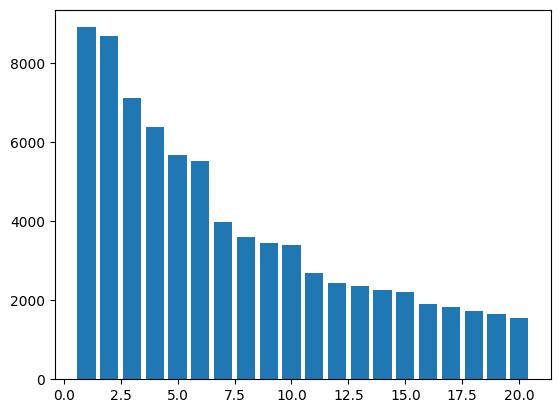

In [16]:
import matplotlib.pyplot as plt
x = [i for i in range(1,21)]
y = l
plt.bar(x, y)

In [ ]:
124155 * 0.1

12415.5

In [17]:
value_count = tags_df['Tag'].value_counts()
l1 = list(value_count[value_count > 10000].index)
l2 = list(valuecounts[valuecounts > 1500].index)

In [18]:
new_tags_df[new_tags_df['Tag'].map(valuecounts) > 1500]['Tag'].value_counts().sum()

77359

In [19]:
questions_df

,Id,Title,Body,Clean_body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,i ve written a database generation script in s...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,has anyone got experience creating sql based a...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,this is something i ve pseudo solved many time...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,i have a little game written in c it uses a da...
...,...,...,...,...
93148,40120130,CMFCMenuButton not properly repainting when to...,"<p>In an C++ MFC project I'm using <a href=""ht...",in an c mfc project i m using cmfcmenubutton u...
93149,40123880,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...,i m trying to work with vscode in my websharpe...
93150,40125310,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,i am working in a project with a huge legacy c...
93151,40129230,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...,i want to manage topic subscription from the c...


In [15]:
merged_df = questions_df.merge(new_tags_df, on='Id', how='left')

result_df = merged_df.groupby('Id')['Tag'].agg(list).reset_index()

new_questions_df = questions_df.merge(result_df, on='Id', how='left')

In [16]:
new_questions_df = new_questions_df.drop(['Id', 'Title', 'Body'], axis = 1)

In [22]:
new_questions_df['Tag'].value_counts()

[nan]                       30794
[java]                       7451
[c#]                         5719
[android]                    5371
[python]                     5322
                            ...  
[c#, java, c++, c]              1
[c#, .net, android]             1
[java, c++, objective-c]        1
[c++, java]                     1
[jquery, ios, iphone]           1
Name: Tag, Length: 489, dtype: int64

In [ ]:
new_questions_df

,Clean_body,Tag
0,has anyone got experience creating sql based a...,"[sql, asp.net]"
1,this is something i ve pseudo solved many time...,[algorithm]
2,i have a little game written in c it uses a da...,"[c#, .net]"
3,i am working on a collection of classes used f...,[c++]
4,i ve been writing a few web services for a net...,[.net]
...,...,...
71679,say i have given a dataframe with most of the ...,[python]
71680,let s say i have the following code a b c for ...,[python]
71681,in an c mfc project i m using cmfcmenubutton u...,[c++]
71682,i am working in a project with a huge legacy c...,[c++]


In [23]:
get_num_words = lambda text: len(text.split())
nel = questions_df['Body'].apply(get_num_words)
nel[nel == 10733]

92532    10733
Name: Body, dtype: int64

In [ ]:
questions_df[92532:]

,Id,Title,Body,Clean_body
92532,38697500,How to traverse through all possible paths to ...,<p>I am not good at programmatically implement...,i am not good at programmatically implementing...
92533,38700440,How to filter haystack results with db query,<p>I need to text-search across my model and f...,i need to text search across my model and filt...
92534,38704850,Docker Trusted Registry - Unable to satisfy av...,<p>I am trying to install the Docker Truster R...,i am trying to install the docker truster regi...
92535,38710140,How do I benchmark a WebGL shader?,<p>One can benchmark regular JavaScript functi...,one can benchmark regular javascript functions...
92536,38713200,How do I turn a dataframe into a series of lists?,<p>I have had to do this several times and I'm...,i have had to do this several times and i m al...
...,...,...,...,...
93148,40120130,CMFCMenuButton not properly repainting when to...,"<p>In an C++ MFC project I'm using <a href=""ht...",in an c mfc project i m using cmfcmenubutton u...
93149,40123880,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...,i m trying to work with vscode in my websharpe...
93150,40125310,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,i am working in a project with a huge legacy c...
93151,40129230,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...,i want to manage topic subscription from the c...


In [ ]:
93153 - 21469
# 72950 - 4763

71684

Filter the DataFrame

In [17]:
new_questions_df = new_questions_df[~new_questions_df['Tag'].apply(lambda x: x == [np.nan])]
new_questions_df.reset_index(drop=True, inplace=True)

In [18]:
x = new_questions_df.iloc[:,:-1]
y = new_questions_df.iloc[:,-1]

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(y)

print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[0 1 0 0 0 0 0]
[('c#',)]
['android' 'c#' 'c++' 'java' 'javascript' 'php' 'python']


In [20]:
x1 = x['Clean_body'].values

In [21]:
from sklearn.model_selection import train_test_split

x_tr,x_test,y_tr,y_test = train_test_split(x1, yt, test_size=0.1, random_state=42, shuffle=True)

x_train,x_val,y_train,y_val = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42, shuffle=True)

In [22]:
len(x_train) ,len(x_val), len(x_test)

(25149, 6288, 3493)

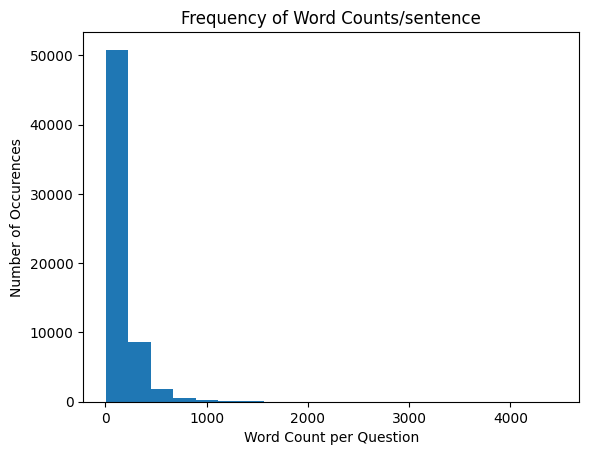

In [30]:
questions = x1
word_cnt = [len(quest.split()) for quest in questions]
plt.hist(word_cnt, bins = 20)
plt.xlabel('Word Count per Question')
plt.ylabel('Number of Occurences')
plt.title("Frequency of Word Counts/sentence")
plt.show()

Most of the questions have word count < 500

Main Model

In [23]:
!pip install -q pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 15.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.1 MB/s eta 0:00:00


In [24]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn ,cuda
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler

import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint

In [36]:
class tagsDataset(Dataset):

  def __init__(self, quest, tags, tokenizer, max_len):
    self.text = quest
    self.tokenizer = tokenizer
    self.labels = tags
    self.max_token_len = max_len

  def  __len__(self):
    return len(self.text)

  def __getitem__(self, item_idx):
    text = self.text[item_idx]
    inputs = self.tokenizer.encode_plus(
        text,
        None,
        add_special_tokens=True,
        max_length=self.max_token_len,
        padding= 'max_length',
        return_token_type_ids = False,
        return_attention_mask = True,
        truncation = True,
        return_tensors = 'pt'
    )
    input_ids = inputs['input_ids'].flatten()
    attention_mask = inputs['attention_mask'].flatten()
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'label':torch.tensor(self.labels[item_idx], dtype=torch.float)
    }


In [37]:
class tagsDatamodule(pl.LightningDataModule):
  def __init__(self, x_train, y_train, x_val, y_val, x_test, y_test, tokenizer, batch_size = 16, max_token_len = 200):
        super().__init__()
        self.tr_text = x_train
        self.tr_label = y_train
        self.val_text = x_val
        self.val_label = y_val
        self.test_text = x_test
        self.test_label = y_test
        self.tokenizer = tokenizer
        self.batch_size = batch_size
        self.max_token_len = max_token_len
  def setup(self, stage=None):
        self.train_dataset = tagsDataset(quest=self.tr_text, tags=self.tr_label, tokenizer=self.tokenizer,max_len = self.max_token_len)
        self.val_dataset  = tagsDataset(quest=self.val_text,tags=self.val_label,tokenizer=self.tokenizer,max_len = self.max_token_len)
        self.test_dataset  = tagsDataset(quest=self.test_text,tags=self.test_label,tokenizer=self.tokenizer,max_len = self.max_token_len)


  def train_dataloader(self):
        return DataLoader(self.train_dataset,batch_size = self.batch_size,shuffle = True , num_workers=2)

  def val_dataloader(self):
        return DataLoader(self.val_dataset,batch_size= 16)

  def test_dataloader(self):
        return DataLoader(self.test_dataset,batch_size= 16)

In [38]:
BERT_MODEL_NAME = "bert-base-uncased" # we will use the BERT base model(the smaller one)
Bert_tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)

In [29]:
max_word_cnt = 200
quest_cnt = 0

# For every sentence...
for question in questions:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = Bert_tokenizer.encode(question, add_special_tokens=True)

    # Update the maximum sentence length.
    if len(input_ids) > max_word_cnt:
        quest_cnt +=1

print(f'# Question having word count > {max_word_cnt}: is  {quest_cnt}')

NameError: ignored

In [39]:
N_EPOCHS = 12
BATCH_SIZE = 32
MAX_LEN = 200
LR = 2e-04

In [40]:
data_module = tagsDatamodule(x_train, y_train, x_val, y_val, x_test, y_test, Bert_tokenizer, BATCH_SIZE, MAX_LEN)
data_module.setup()

In [41]:
class tagsClassifier(pl.LightningModule):
    def __init__(self, n_classes=7, steps_per_epoch=None, n_epochs=3, lr=2e-4):
        super().__init__()

        self.bert = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
        self.classifier = nn.Linear(self.bert.config.hidden_size,n_classes)
        self.steps_per_epoch = steps_per_epoch
        self.n_epochs = n_epochs
        self.lr = lr
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self,input_ids, attn_mask):
        output = self.bert(input_ids = input_ids ,attention_mask = attn_mask)
        output = self.classifier(output.pooler_output)
        return output

    def training_step(self,batch,batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = self(input_ids,attention_mask)
        loss = self.criterion(outputs,labels)
        self.log('train_loss',loss , prog_bar=True,logger=True)
        return {"loss" :loss, "predictions":outputs, "labels": labels }


    def validation_step(self,batch,batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = self(input_ids,attention_mask)
        loss = self.criterion(outputs,labels)
        self.log('val_loss',loss , prog_bar=True,logger=True)
        return loss

    def test_step(self,batch,batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = self(input_ids,attention_mask)
        loss = self.criterion(outputs,labels)
        self.log('test_loss',loss , prog_bar=True,logger=True)
        return loss


    def configure_optimizers(self):
        optimizer = AdamW(self.parameters() , lr=self.lr)
        warmup_steps = self.steps_per_epoch//3
        total_steps = self.steps_per_epoch * self.n_epochs - warmup_steps
        scheduler = get_linear_schedule_with_warmup(optimizer,warmup_steps,total_steps)
        return [optimizer], [scheduler]

In [42]:
steps_per_epoch = len(x_train)//BATCH_SIZE
model = tagsClassifier(n_classes=7, steps_per_epoch=steps_per_epoch, n_epochs=N_EPOCHS, lr=LR)

In [43]:
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    filename='QTag-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3, #save the top 3 models
    mode='min', #mode of the monitored quantity  for optimization
)

In [36]:
pip install -U 'torch_xla>=1.13'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: uritemplate
    Found existing installation: uritemplate 4.1.1
    Uninstalling uritemplate-4.1.1:
      Successfully uninstalled uritemplate-4.1.1
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [44]:
trainer = pl.Trainer(max_epochs = N_EPOCHS , accelerator="gpu", devices="1", callbacks=[checkpoint_callback])

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [52]:
?pl.Trainer

In [34]:
torch.cuda.empty_cache()

In [45]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  52736 B   | 566088 KiB |   4475 MiB |   4475 MiB |
|       from large pool |      0 B   | 565504 KiB |   4399 MiB |   4399 MiB |
|       from small pool |  52736 B   |   1656 KiB |     75 MiB |     75 MiB |
|---------------------------------------------------------------------------|
| Active memory         |  52736 B   | 566088 KiB |   4475 MiB |   4475 MiB |
|       from large pool |      0 B   | 565504 KiB |   4399 MiB |

In [ ]:
trainer.fit(model, data_module)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type              | Params
-------------------------------------------------
0 | bert       | BertModel         | 109 M 
1 | classifier | Linear            | 5.4 K 
2 | criterion  | BCEWithLogitsLoss | 0     
-------------------------------------------------
109 M     Trainable params
0         Non-trainable params
109 M     Total params
437.950   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
model = TFAutoModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation=True)

In [ ]:
tags_encoded =